<a id='scenario'> </a>
# **Scenario**

You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share
company in Chicago. The director of marketing believes the company’s future success
depends on maximizing the number of annual memberships. Therefore, your team wants to
understand how casual riders and annual members use Cyclistic bikes differently. From these
insights, your team will design a new marketing strategy to convert casual riders into annual
members. But first, Cyclistic executives must approve your recommendations, so they must be
backed up with compelling data insights and professional data visualizations. The analysis is divided into 6 phases: **Ask, Prepare, Process, Analyze, Share** and **Act**

### **About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown
to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations
across Chicago. The bikes can be unlocked from one station and returned to any other station
in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to
broad consumer segments. One approach that helped make these things possible was the
flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.
Customers who purchase single-ride or full-day passes are referred to as casual riders.
Customers who purchase annual memberships are Cyclistic members.

# **Table of contents**

### 1. **[Ask](#Ask)**
### 2. **[Prepare](#Prepare)**
### 3. **[Process](#Process)**
### 4. **[Analysis and Visualization(Tableau)](#Analysis)**
### 5. **[Summary](#Summary)**

<a id='Ask'> </a>
# **1. Ask**

 ### **1.1 Identify the Business Task**

 Lily Moreno the director of marketing has set a clear goal: Design marketing strategies aimed at converting casual  riders into annual members. In order to do that, Moreno assigned you the question to answer: 
**How do annual members and casual riders use Cyclistic bikes differently?**
### **1.2 Consider Key Stakeholders**

**Lily Moreno**: The director of marketing and your manager. Moreno is responsible for
the development of campaigns and initiatives to promote the bike-share program.
These may include email, social media, and other channels.

**Cyclistic marketing analytics team**: A team of data analysts who are responsible for
collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
You joined this team six months ago and have been busy learning about Cyclistic’s
mission and business goals—as well as how you, as a junior data analyst, can help
Cyclistic achieve them.

**Cyclistic executive team**: The notoriously detail-oriented executive team will decide
whether to approve the recommended marketing program.

<a id='Prepare'> </a>
# **2. Prepare**

### **2.1 Data for Analysis**

Cyclistic’s historical trip data for the last 12 month **[uploaded on Kaggle](https://www.kaggle.com/datasets/linarabzalov/cyclistic-case-study-dataset-1123-1024)** from **[provided resourse](https://divvy-tripdata.s3.amazonaws.com/index.html)**. The datasets have a different name because Cyclistic
is a fictional company. For the purposes of this case study, the datasets are appropriate and
will enable you to answer the business questions.

### **2.2 How Data is Organized**

This dataset consists of 12 CSV files, that contain monthly information about trips from the period 11/2023 to 10/2024. Each file is a collection of trips, represented as observations with their corresponding attributes.

### **2.3 Ethical Principles and Standards**

The anonymized dataset was collected from **Divvy**, an authoritative source, so there is no reason to believe that it may contain bias or does not correspond to the ROCCC(relible, original, comprehensive, current, cited) scheme. **Divvy** is a program of the Chicago Department of Transportation (CDOT), which owns the city’s bikes, stations and vehicles. Divvy provides residents and visitors with a convenient, fun and affordable transportation option for getting around and exploring Chicago.The data has been made available by Motivate International Inc. under this **[license](https://divvybikes.com/data-license-agreement)**.

<a id='Process'> </a>
# **3. Process**

### **3.1 Tool for Analysis**

As we have a large dataset consisting of millions of observations, I believe R would be a good choice for analyzing the data. I also have experience with creating visualizations using R, if necessary. However, for visualization purposes, I would prefer to use Tableau, as I wanted to keep all visualisations in one place.

### **3.2 Cleaning the Dataset**

In [1]:
# Download the necessary libraries
library(data.table)
library(tidyr)
library(dplyr)
library(readr)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:data.table’:

    between, first, last




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Creating a list with file paths.
file_paths <- list.files(path = "/kaggle/input/cyclistic-case-study-dataset-1123-1024", pattern = "\\.csv$", full.names = TRUE)
# Quick check if there is the same number of files as expected.
print(file_paths)

 [1] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2023_11.csv"
 [2] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2023_12.csv"
 [3] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_01.csv"
 [4] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_02.csv"
 [5] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_03.csv"
 [6] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_04.csv"
 [7] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_05.csv"
 [8] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_06.csv"
 [9] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_07.csv"
[10] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_08.csv"
[11] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_09.csv"
[12] "/kaggle/input/cyclistic-case-study-dataset-1123-1024/2024_10.csv"


Creating one large data set from all 12 CSV files. Since we have a huge amount of data (each CSV file contains several hundred thousand lines). I will use the fread function from data.table, as it will allow me to quickly read the data.

In [3]:
trips <- rbindlist(lapply(file_paths, fread))

In [4]:
# Checking structure, number of rows, column names and their types.
head(trips)
str(trips)
summary(trips)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:05,2023-11-30 22:13:27,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.88110,-87.62408,41.94947,-87.64645,member
6322270563BF5470,electric_bike,2023-11-03 09:44:02,2023-11-03 10:17:15,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.95287,-87.65003,41.95283,-87.64999,member
B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:44,2023-11-30 11:40:08,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.89753,-87.62869,41.89745,-87.62872,member
CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:45,2023-11-08 10:27:05,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.92628,-87.63083,41.92628,-87.63083,member
EB8381AA641348DB,classic_bike,2023-11-03 16:20:25,2023-11-03 16:54:25,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.92628,-87.63083,41.92628,-87.63083,member
B8CF14EA423D6886,electric_bike,2023-11-30 16:15:53,2023-11-30 16:39:52,Pine Grove Ave & Waveland Ave,TA1307000150,Millennium Park,13008,41.94942,-87.64638,41.88103,-87.62408,member


Classes ‘data.table’ and 'data.frame':	5933712 obs. of  13 variables:
 $ ride_id           : chr  "4EAD8F1AD547356B" "6322270563BF5470" "B37BDE091ECA38E0" "CF0CA5DD26E4F90E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2023-11-30 21:50:05" "2023-11-03 09:44:02" ...
 $ ended_at          : POSIXct, format: "2023-11-30 22:13:27" "2023-11-03 10:17:15" ...
 $ start_station_name: chr  "Millennium Park" "Broadway & Sheridan Rd" "State St & Pearson St" "Theater on the Lake" ...
 $ start_station_id  : chr  "13008" "13323" "TA1307000061" "TA1308000001" ...
 $ end_station_name  : chr  "Pine Grove Ave & Waveland Ave" "Broadway & Sheridan Rd" "State St & Pearson St" "Theater on the Lake" ...
 $ end_station_id    : chr  "TA1307000150" "13323" "TA1307000061" "TA1308000001" ...
 $ start_lat         : num  41.9 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.7 -87.6 -87.6 -87.6 ...
 $ end_lat     

   ride_id          rideable_type        started_at                    
 Length:5933712     Length:5933712     Min.   :2023-11-01 00:01:46.00  
 Class :character   Class :character   1st Qu.:2024-04-18 13:23:12.25  
 Mode  :character   Mode  :character   Median :2024-06-30 00:37:00.33  
                                       Mean   :2024-06-12 20:51:39.86  
                                       3rd Qu.:2024-08-30 12:43:47.74  
                                       Max.   :2024-10-31 23:58:29.32  
                                                                       
    ended_at                      start_station_name start_station_id  
 Min.   :2023-10-25 07:31:46.00   Length:5933712     Length:5933712    
 1st Qu.:2024-04-18 13:38:14.00   Class :character   Class :character  
 Median :2024-06-30 01:01:14.61   Mode  :character   Mode  :character  
 Mean   :2024-06-12 21:08:58.50                                        
 3rd Qu.:2024-08-30 13:00:23.22                                 

We now have approximately 5.9 million rows with 13 attributes each. The columns contain the correct type of values, so there is no need to change them.

Next, let's check our data for duplicate entries and remove them if they exist.

In [5]:
trips_cleaned <- unique(trips)

The ride_id column is our primary key and must contain only unique values. Therefore, let's also check for any duplicate entries in this column.

In [6]:
trips_cleaned <- unique(trips_cleaned, by = "ride_id")
# Keep track of the number of rows that were deleted.
deleted <- nrow(trips) - nrow(trips_cleaned)
deleted

[1] 211

You might have noticed that the end_lat and end_lng columns contain incorrect minimum and maximum values, as well as NA values. To clean up the data and make it more accurate, let's remove any outliers based on the geographical location of Chicago.

In [7]:
trips_cleaned <- filter(trips_cleaned, (start_lat > 40 & start_lat < 44 &
                                        end_lat > 40 & end_lat < 44 &
                                        start_lng > -90 & start_lng < -86 &
                                        end_lng > -90 & end_lng < -86))
# Keep track of the number of rows that were deleted.
deleted <- nrow(trips) - nrow(trips_cleaned)
deleted

[1] 7613

In [8]:
# Count number of null values in each column.
colSums(is.na(trips_cleaned))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0                  0                  0 
     member_casual 
                 0

It looks like we no longer have NA values in the data, but looking at the data in one of the excel files before analysis, I noticed empty values in the start_station_name and end_station_name fields, but R did not find NA values in these columns. Maybe it's just empty strings that R doesn't count as NA. Let's check it out too, I will check only character type columns, because only they can contain empty strings. 

In [9]:
colSums(trips_cleaned[, c("ride_id", "rideable_type", "start_station_name", "start_station_id",
                          "end_station_name", "end_station_id", "member_casual")] == "")

ride_id      rideable_type start_station_name   start_station_id 
                 0                  0            1079240            1079240 
  end_station_name     end_station_id      member_casual 
           1104574            1104574                  0

As shown above, there are 1,079,240 missing values in the columns for the start station name and the start station ID. Similarly, there are 1,104,574 missing values in the end station name and end station ID columns.
It would be helpful to know how many rows have missing values, so I'm going to figure that out too.

In [10]:
emtpy_values <- count(filter(trips_cleaned, start_station_name == '' | end_station_name == ''))
# Number of rows with missing data
print(emtpy_values)
# Percentage of rows with missing data from the total number of rows
print(emtpy_values/nrow(trips_cleaned) * 100)

         n
     <int>
1: 1652671


          n
      <num>
1: 27.88801


I do not see an opportunity to fill in these lines without additional data, despite this, I will not delete them, because they contain other important information and the total number of these lines is more than a quarter of all data. However, I will need to take into account the missing data when analyzing the corresponding attributes.

Next, I want to check is unique values for bike type and membership to see if we have some missspealing or inconsistenses.

In [11]:
print(unique(trips_cleaned$rideable_type))
print(unique(trips_cleaned$member_casual))

[1] "electric_bike"    "classic_bike"     "electric_scooter"


[1] "member" "casual"


It seems okay. We have three types of bikes: electric bike, classic bike, and electric scooter, as well as two membership statuses: member and casual.

### **3.3 Calculating New Attributes**

At this momoent data can only be aggregated at the trip level, which is an overly detailed process. I want to add some additional columns of data, such as the hour, day, and month of the trip, which provide additional options for data aggregation.

In [12]:
# Createing column trip_duration. Operators usually have per-minute tariffs
# so let's count in minutes and immediately set the data type as numeric.
trips_cleaned[, trip_duration := round(as.numeric(ended_at - started_at, units = "mins"), 1)]

Warning message:
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”


In [13]:
# Let's check the statistics for the newly created column.
summary(trips_cleaned$trip_duration)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-16656.50      5.50      9.70     15.45     17.20   1509.40 

As we can see, there is some incorrect information here. Trip duration cannot be negative as we see in lowest valuse and the highest values indicate a continuous use of the bike for more than a day witch looks suspicious, unless the customers have forgotten to checkout bike after using it. Let's clean up the data using a statistical method that allows us to determine the boundaries of possible stuffing.

In [14]:
# Calculate the first and third quartiles of the trip_duration column.
q1 <- quantile(trips_cleaned$trip_duration, probs = 0.25)
q3 <- quantile(trips_cleaned$trip_duration, probs = 0.75)
# Calculating the interquartile range.
IQR <- q3-q1
# Calculating the outlier boundaries.
lower_bound <- q1 - 1.5 * IQR
upper_bound <- q3 + 1.5 * IQR
# Create the second version of cleaned dataset without trip duration outliers and see number of rows after
trips_cleaned_v2 <- filter(trips_cleaned, trip_duration <= upper_bound & trip_duration >= lower_bound)
# Keep track of the number of rows that were deleted.
deleted <- nrow(trips) - nrow(trips_cleaned_v2)
deleted
nrow(trips_cleaned_v2)

[1] 447350

[1] 5486362

In [15]:
# Let's check the statistics for the newly created column.
summary(trips_cleaned_v2$trip_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -5.00    5.30    9.00   10.93   14.90   34.70 

The maximum value now seems to be accurate, but we still have some negative values. To clean the data from these values, we need to exclude them as well.

In [16]:
trips_cleaned_v2 <- filter(trips_cleaned_v2, trip_duration > 0)
# Keep track of the number of rows that were deleted.
deleted <- nrow(trips) - nrow(trips_cleaned_v2)
deleted

[1] 459959

In [17]:
# Createing columns day_of_week and month.
trips_cleaned_v2[, day_of_week := weekdays(started_at)]
trips_cleaned_v2[, month:= format(started_at, "%B")]

Warning message:
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”


In [18]:
# Let's see what we've got so far.
head(trips_cleaned_v2)
nrow(trips_cleaned_v2)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,month
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:05,2023-11-30 22:13:27,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.88110,-87.62408,41.94947,-87.64645,member,23.4,Thursday,November
6322270563BF5470,electric_bike,2023-11-03 09:44:02,2023-11-03 10:17:15,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.95287,-87.65003,41.95283,-87.64999,member,33.2,Friday,November
B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:44,2023-11-30 11:40:08,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.89753,-87.62869,41.89745,-87.62872,member,0.4,Thursday,November
CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:45,2023-11-08 10:27:05,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.92628,-87.63083,41.92628,-87.63083,member,25.3,Wednesday,November
EB8381AA641348DB,classic_bike,2023-11-03 16:20:25,2023-11-03 16:54:25,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.92628,-87.63083,41.92628,-87.63083,member,34.0,Friday,November
B8CF14EA423D6886,electric_bike,2023-11-30 16:15:53,2023-11-30 16:39:52,Pine Grove Ave & Waveland Ave,TA1307000150,Millennium Park,13008,41.94942,-87.64638,41.88103,-87.62408,member,24.0,Thursday,November


[1] 5473753

### **3.4 Summary of stage**

* The total number of rows deleted was 459,959;
* The number of remaining rows is 5,473,753.

At the end of process stage I have: 
* Checked the data for error;
* Transformed the data to make it easier to work with, by creating three new column contains information about trip duration, day of the week, and month in which the ride took place;
* Cleaned the data from duplicates and outliers;
* Documented the cleaning process.

<a id='Analysis'> </a>
# **4. Analysis and Visualization(Tableau)**

#### **4.1 Comparison of trip duration statistics for members and custom users.**


First, let's look at the statistics on the duration of trips again, after we cleaned up the data in the previous step. Then compare the data on the type of users and the duration of the trip

In [19]:
summary(trips_cleaned_v2$trip_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.10    5.30    9.00   10.96   14.90   34.70 

In [20]:
aggregate(trip_duration ~ member_casual, data = trips_cleaned_v2, FUN = mean)
aggregate(trip_duration ~ member_casual, data = trips_cleaned_v2, FUN = median)

member_casual,trip_duration
<chr>,<dbl>
casual,12.23124
member,10.30315


member_casual,trip_duration
<chr>,<dbl>
casual,10.3
member,8.4


In [21]:
# Calculating the number of trips and percentage of total trips per user type.
# Recording the result in a CSV file for creating visualization in Tableau.
trips_cleaned_v2 %>%
    group_by(member_casual) %>%
    summarise(number_of_trips = n()) %>%
    mutate(percentage = round((number_of_trips / sum(number_of_trips) * 100),1)) %>%
    write_csv("member_casual_trips_percentage.csv") %>% # 
    View()

member_casual,number_of_trips,percentage
<chr>,<int>,<dbl>
casual,1862942,34
member,3610811,66


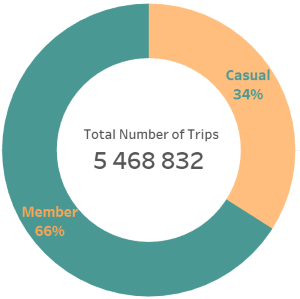

As we can see from the result above, the number of trips made by subscribers is almost twice as much as the number of trips made by casuals and amounts to 66% and 34%, respectively.

### **4.2 Number of trips and the average trip duration for each type of user and day of the week**

Next, I want to calculate the number of trips and the average trip duration for each type of user and day of the week. But first, we need to arrange the days of the week in the way we used to see them. First come workdays, then weekends.

In [22]:
trips_cleaned_v2$day_of_week <- ordered(
    trips_cleaned_v2$day_of_week,
    levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    )
trips_cleaned_v2 %>% 
    group_by(member_casual, day_of_week) %>%  
    summarise(number_of_rides = n(), average_duration = mean(trip_duration)) %>%
    arrange(member_casual, day_of_week) %>%
    write_csv("day_of_week_stat.csv") %>%
    View()

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Monday,216959,11.749463
casual,Tuesday,207682,11.322800
casual,Wednesday,245784,11.488784
casual,Thursday,247956,11.437430
casual,Friday,274952,12.085348
casual,Saturday,368870,13.347522
casual,Sunday,300739,13.231623
member,Monday,510703,9.959412
member,Tuesday,550332,10.083932


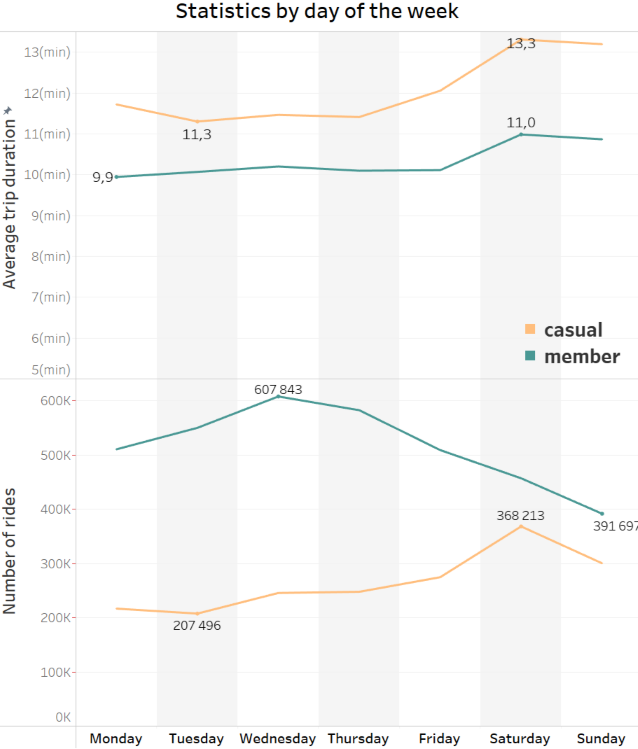

The result clearly shows that the average duration of the trip remains approximately at the same level during the working week and increases on weekends. Probably, on working days, users use a bicycle for short trips between work and the subway, for example, and on weekends more for entertainment purposes.

We also see a difference in the behavior of subscribers and non-subscribers in terms of the number of trips they make. Subscribers make more trips on weekdays with a peak on Wednesday, while non-subscribers, on the contrary, make more intensive trips on weekends, especially on Saturday

### **4.3 Number of trips and the average trip duration for each type of user and month**

Just as we did with the days of the week, before counting the values by month, we need to organize them in a more readable order. ut we also have to keep in mind that we do not use data for a calendar year, but for the period from 11/23 to 10/24, so we start from November.

In [23]:
trips_cleaned_v2$month <- ordered(
    trips_cleaned_v2$month,
    levels=c("November", "December", "January", "February", "March", "April", "May",
             "June", "July", "August", "September", "October")
    )
trips_cleaned_v2 %>% 
    group_by(member_casual, month) %>%
    summarise(number_of_rides = n(), average_duration = mean(trip_duration)) %>%
    arrange(member_casual, month) %>%
    write_csv("month_stat.csv") %>%
    View()

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,November,90210,10.545905
casual,December,48258,9.948092
casual,January,23068,8.988699
casual,February,42192,10.739159
casual,March,71844,11.627475
casual,April,111501,12.081519
casual,May,190995,12.890667
casual,June,253169,13.025503
casual,July,266404,13.076172


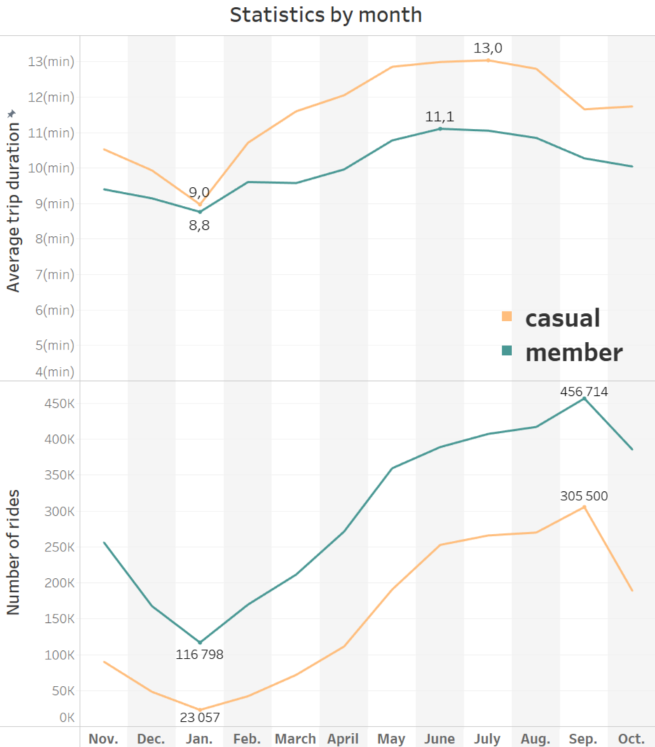
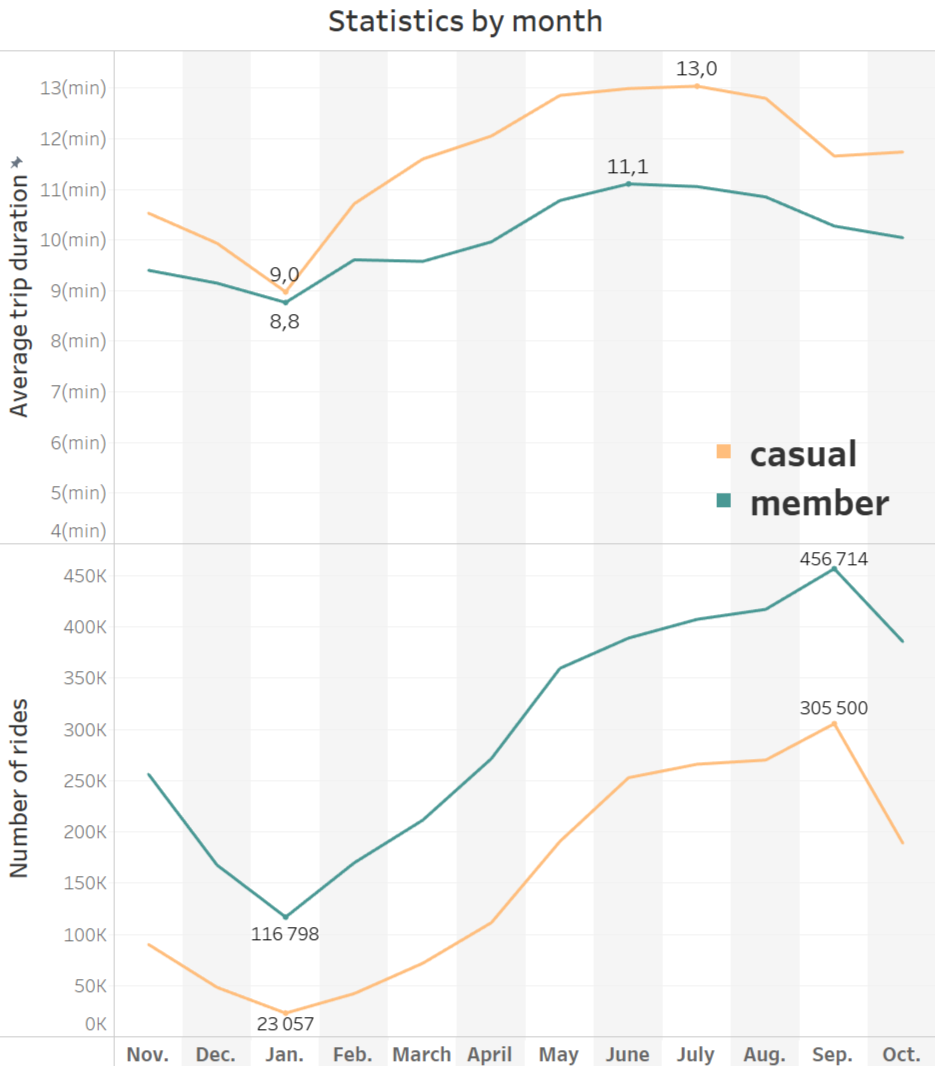

Here we see a clear pattern in the use of the service by both groups. January is the month of the least activity both in terms of the duration of trips and their number, then the indicators increase with the peak of the duration of trip in June/July and the peak of the number of trips in September.

### **4.4 Number of trips for each type of user and hour**

In [24]:
trips_cleaned_v2 %>%
    mutate(hour_of_trip = as.numeric(format(started_at, "%H"))) %>%
    group_by(member_casual, hour_of_trip) %>%
    count(name = 'number_of_trips') %>%
    write_csv("hour_stat.csv") %>%
    View()

member_casual,hour_of_trip,number_of_trips
<chr>,<dbl>,<int>
casual,0,32499
casual,1,21609
casual,2,13358
casual,3,7391
casual,4,5829
casual,5,11600
casual,6,27005
casual,7,50467
casual,8,69717


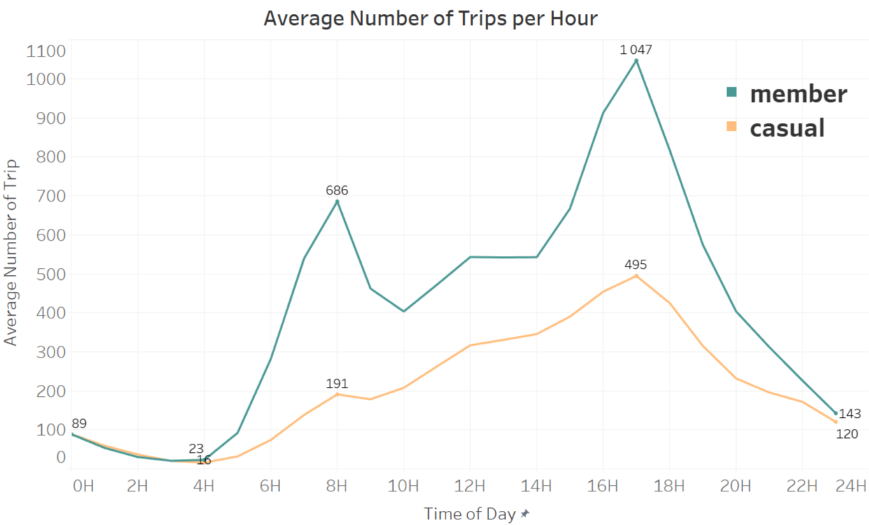

The behavior of both groups is well characterized by this graph. We observe two peaks for members at 8 and 17 o'clock, which corresponds to peak hours ([Chicago rush hours](https://phillipslawoffices.com/when-is-rush-hour-in-chicago/#:~:text=Typical%20rush%20hours%20in%20Chicago&text=The%20worst%20times%20for%20traffic,also%20contribute%20to%20road%20congestion.)). The demand of non-members grows evenly throughout the day, also reaching a peak at 17 o'clock.

### **4.5 Spatial Analysis**

Since we have spatial data, I decided to analyze it using GIS and put this section in a separate notebook to avoid exceeding the maximum notebook size limit in Kaggle. You can read this analysis at **[this link](https://www.kaggle.com/code/linarabzalov/bike-share-company-spatial-analysis)**

But first we need to export the current date frame so that we can use it

In [25]:
write_csv(trips_cleaned_v2, "trips_cleaned_v2.csv")

### **4.6 Bike type preferences**

The last thing I need to know to answer a business question is the distribution of users by type of bike. However, this data has limitations. We don't have information about the number of bikes of each type, their proportion, or how evenly they are distributed in the city. Without this data, it's impossible to make accurate decisions. Therefore, I am including this data solely for the purpose of study.

In [26]:
trips_cleaned_v2 %>%
    group_by(member_casual, rideable_type) %>%
    count(name = "number_of_trips") %>%
    write_csv("bike_type_stat.csv") %>%
    View()

member_casual,rideable_type,number_of_trips
<chr>,<chr>,<int>
casual,classic_bike,771095
casual,electric_bike,1010630
casual,electric_scooter,81217
member,classic_bike,1714314
member,electric_bike,1837840
member,electric_scooter,58657


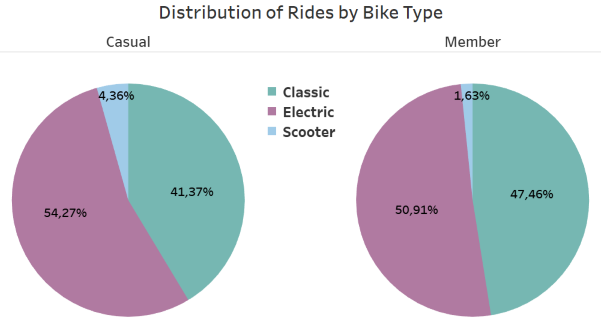

### **4.7 Dashboard**

Here, I want to share the complete dashboard I created in Tableau, which includes all the visualizations mentioned above. Unfortunaly my free Tableau Public programm does not allow me to post a desktop dashboard to Tablea Public, so i made a screen of it. However, if you want to see an interacrtiv dashboard in your Tableau you can download it **[here](https://drive.google.com/file/d/1HeWG-U7N7y9agZehkD-LYbNsj06yZq7L/view?usp=sharing)**

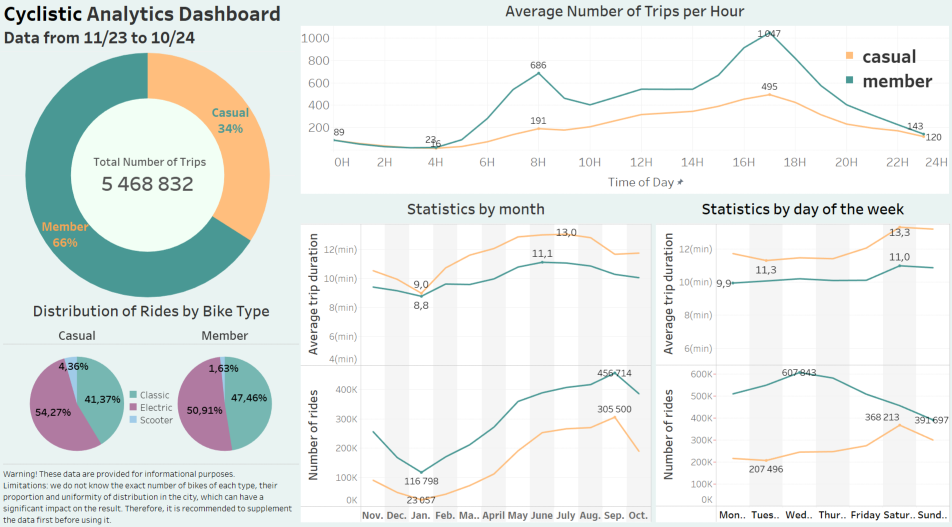

<a id='Summary'> </a>
# **5. Summary**

### **5.1 Main findings**

* 2/3 and 1/3 - the proportion of the number of trips of members and casuals;
* The period of the most intensive use of the service is from 7 to 20 o'clock, with the highest values during peak hours 8 and 17;
* The service as a whole is subject to seasonality. In winter, activity decreases until January and then increases and reaches a peak in July - September;
* Members take shorter trips, the duration of which remains approximately the same throughout the week. The duration of trips for casuals users increases significantly on weekends;
* Casual users, on average, make twice as many trips on weekends as on weekdays;
* On average, members make 30% more trips on weekdays than on weekends.

### **5.2 Recomendations**

To encourage non-subscribers to become subscribers, I would recommend:
* To target an advertising company to explain the advantages of using a bicycle in the city:
  * Demonstrate how this will reduce costs;
  * how much faster it is possible to get from one place to another during rush hours using a bicycle instead of a car;
  * how it helps the ecology of the city;
* Carry out street advertising in the central area, as well as along the embankment in the gap between Soldier Field and Lincoln Park.
* To conduct an advertising campaign on weekends, because the number of non-subscribers at this time is much higher;
* Encourage users to sign up for an annual subscription at once. This will help to offset the seasonality of the business.